## EAST AFRICA VIRTUAL HACKATHON 2021: SWAHILI NEWS ML CHALLENGE

## Let's Get Started 

In [9]:
# import important modules
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# text preprocessing modules
from string import punctuation 

# text preprocessing modules
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
):
    nltk.download(dependency)
    
import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [2]:
# load data
data = pd.read_csv("clinical_trials_on_cancer_data_clasificacion.csv", sep=',', encoding = 'utf-8')

In [3]:
# show top five rows of data
data.head() 

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...


In [4]:
# check the shape of the data
data.shape

(12000, 2)

In [5]:
# check missing values in data
data.isnull().sum()

label                  0
study_and_condition    0
dtype: int64

In [7]:
# evalute news sentiment distribution
data.label.value_counts()

__label__0    6000
__label__1    6000
Name: label, dtype: int64

### Data Preparation 

In [10]:
stop_words =  stopwords.words('english')

def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

In [12]:
#clean the review
data["cleaned_study_and_condition"] = data["study_and_condition"].apply(text_cleaning)


In [24]:
data.head()

,label,study_and_condition,cleaned_study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...,study intervention Saracatinib recurrent verru...
1,__label__1,study interventions are Stem cell transplantat...,study intervention Stem cell transplantation h...
2,__label__0,study interventions are Lenograstim . recurren...,study intervention Lenograstim recurrent adult...
3,__label__0,study interventions are Doxorubicin . stage ii...,study intervention Doxorubicin stage iii diffu...
4,__label__1,study interventions are Poly I-C . prostate ca...,study intervention Poly I C prostate cancer di...


In [13]:
#split features and target from train data 
X = data["cleaned_study_and_condition"]
y = data.label.values

In [ ]:
# Transform data 
#tfidf_transformer = TfidfVectorizer(lowercase=False)#

#tfidf_transformer.fit(X)

#transform data 
#X_transformed = tfidf_transformer.transform(X)


In [14]:
# split data into train and validate

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
    stratify=y,
)

### Create Classifier 

In [15]:
# The multinomial Naive Bayes classifier is suitable for classification with discrete features
# (e.g., word counts for text classification).

# Create a classifier in pipeline
label_classifier = Pipeline(steps=[
                                 ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('naive_bayes',MultinomialNB())
                                 ])

In [16]:
# train the sentiment classifier 
label_classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('naive_bayes', MultinomialNB())])

In [17]:
# test model performance on valid data 
y_preds = label_classifier.predict(X_valid)

In [18]:
# evalute model performance by using log_loss in the validation data
accuracy_score(y_valid,y_preds)

0.8

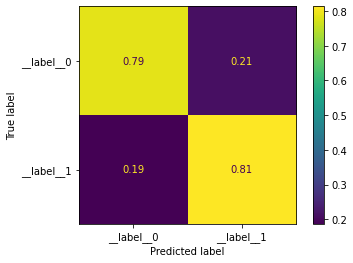

In [19]:
# plot the comfusion matrix
plot_confusion_matrix(label_classifier, X_valid, y_valid, normalize='true')

In [20]:
# check the classification report
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

  __label__0       0.81      0.79      0.80       900
  __label__1       0.79      0.81      0.80       900

    accuracy                           0.80      1800
   macro avg       0.80      0.80      0.80      1800
weighted avg       0.80      0.80      0.80      1800



In [23]:
#save model 
import joblib 

joblib.dump(label_classifier, 'model_pipeline.joblib')

['model_pipeline.joblib']